# <span style="color:slateblue">Activity 2
#### <span style="color:hotpink">Karla Violeta Ruiz Vargas - 614201014
#### <span style="color:slateblue">Juan Sebastián Vargas Arévalo - 614221007

## <span style="color:slateblue">1. <span style="color:black">Normalize and standardize the data. Remember that only the data up to December 2023 will be used.

Following the recent activity, we have gathered the main aspects pertaining to the data quality check. Consequently, we will move forward by implementing the following protocol for data processing:
- Visualization of the data and analysis of the information it conveys.
- Elimination of duplicates.
- Adjustment of column formats where deemed necessary.
- Exclusion of outliers.
- Conversion of categorical data to numerical to ensure data homogenization.
- Removal of columns deemed irrelevant for the analysis.

In [1]:
# Import the data
import pandas as pd
data = pd.read_csv('data.csv')

#Tools we used for analyse the information of the data
#data.head()
#data.info()
#data.describe()
#data.isna().sum()

In [2]:
# Percentage of given values for each columns
print("List of given values percetages \n")
counts = data.count()
cols = data.columns
total = data.shape[0] 
i=0

def percetage_cal(total,count):
     return 100 * float(count)/float(total)

for item in counts:
    print(f" {cols[i]} = {round(percetage_cal(total,item), 2)}%")
    i = i + 1

List of given values percetages 

 DR_NO = 100.0%
 Date Rptd = 100.0%
 DATE OCC = 100.0%
 TIME OCC = 100.0%
 AREA = 100.0%
 AREA NAME = 100.0%
 Rpt Dist No = 100.0%
 Part 1-2 = 100.0%
 Crm Cd = 100.0%
 Crm Cd Desc = 100.0%
 Mocodes = 86.01%
 Vict Age = 100.0%
 Vict Sex = 86.7%
 Vict Descent = 86.69%
 Premis Cd = 100.0%
 Premis Desc = 99.94%
 Weapon Used Cd = 34.54%
 Weapon Desc = 34.54%
 Status = 100.0%
 Status Desc = 100.0%
 Crm Cd 1 = 100.0%
 Crm Cd 2 = 7.26%
 Crm Cd 3 = 0.24%
 Crm Cd 4 = 0.01%
 LOCATION = 100.0%
 Cross Street = 15.69%
 LAT = 100.0%
 LON = 100.0%


In [3]:
# Elimination of duplicates
data.info()
data.drop_duplicates(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925720 non-null  int64  
 1   Date Rptd       925720 non-null  object 
 2   DATE OCC        925720 non-null  object 
 3   TIME OCC        925720 non-null  int64  
 4   AREA            925720 non-null  int64  
 5   AREA NAME       925720 non-null  object 
 6   Rpt Dist No     925720 non-null  int64  
 7   Part 1-2        925720 non-null  int64  
 8   Crm Cd          925720 non-null  int64  
 9   Crm Cd Desc     925720 non-null  object 
 10  Mocodes         796258 non-null  object 
 11  Vict Age        925720 non-null  int64  
 12  Vict Sex        802562 non-null  object 
 13  Vict Descent    802552 non-null  object 
 14  Premis Cd       925709 non-null  float64
 15  Premis Desc     925161 non-null  object 
 16  Weapon Used Cd  319701 non-null  float64
 17  Weapon Des

In [4]:
#Adjustment of column formats where deemed necessary.
data['DATE OCC']=pd.to_datetime(data['DATE OCC'])
#data['Date Rptd']=pd.to_datetime(data['Date Rptd'])

/tmp/ipykernel_19603/1593204521.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC']=pd.to_datetime(data['DATE OCC'])


To address the exclusion of outliers, we utilize the percentile range method, a technique aimed at managing outliers by identifying and limiting extreme values based on a predetermined range threshold. This method involves calculating threshold values using percentiles and replacing any data points that exceed these ranges with the corresponding threshold values.

In [5]:
data["Vict Age"].value_counts().to_frame()

,count
Vict Age,
0,234185
30,20914
35,20519
31,20000
29,19947
...,...
97,69
-2,23
-4,3


In [6]:
upper_limit = data['Vict Age'].quantile(0.75)
lower_limit = data['Vict Age'].quantile(0.25)
median =  data["Vict Age"].median()
iqr=(upper_limit-lower_limit)*1.5

print('The upper limit is:', upper_limit)
print('\nThe lower limit is:', lower_limit)
print(iqr)

The upper limit is: 45.0

The lower limit is: 0.0
67.5


In [7]:
data = data[data['Vict Age']>=lower_limit]
data = data[data['Vict Age']<=upper_limit+iqr]
data["Vict Age"].value_counts().to_frame()

,count
Vict Age,
0,234185
30,20914
35,20519
31,20000
29,19947
...,...
94,101
95,94
96,92


In [8]:
#Convert Categorical data to numeric
from sklearn.preprocessing import LabelEncoder

data['Vict Sex'] = data['Vict Sex'].fillna('-')
data['Vict Sex'] = data['Vict Sex'].replace(['-'], 'Otro')
data['Vict Sex'] = data['Vict Sex'].replace(['H'], 'Otro')
data['Vict Sex'] = data['Vict Sex'].replace(['X'], 'Otro')
data['Vict Sex'] = data['Vict Sex'].replace([''], 'Otro')

label_encoder = LabelEncoder()
data['Vict Sex'].value_counts().to_frame()

,count
Vict Sex,
M,379010
F,337972
Otro,208625


In [9]:
data['Vict Sex'] = label_encoder.fit_transform(data['Vict Sex'])
data['Vict Sex'].value_counts().to_frame()

,count
Vict Sex,
1,379010
0,337972
2,208625


In [10]:
label_encoder = LabelEncoder()
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])
data['Vict Descent'].value_counts().to_frame()

,count
Vict Descent,
7,281376
17,187063
2,129711
20,123167
18,93845
12,73007
1,20310
10,5085
5,4002


In [11]:
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Status'].value_counts().to_frame()

,count
Status,
3,740207
1,100207
0,80478
4,3027
5,1683
2,5


In [12]:
#Removal of columns deemed irrelevant for the analysis
data.drop(['AREA NAME','Part 1-2','Crm Cd Desc','Mocodes','Premis Desc','Weapon Desc','Status Desc','Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'], inplace=True, axis=1)

data.dropna(inplace=True)

Finally, we are creating the cleaned dataset to work with the data more efficiently

In [13]:
cl_data=data

In [14]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No',
       'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Weapon Used Cd', 'Status'],
      dtype='object')

After cleaning the data,  we are going to extract the year of the `DATE OCC` column to split the data into the trainer and the test sets with the condition required.

In [15]:
cl_data['Year'] = cl_data['DATE OCC'].dt.year
trainer_set = cl_data[cl_data.Year <2024]
test_set = cl_data[cl_data.Year ==2024]

In [16]:
trainer_set['DATE OCC']

9        2020-12-31
11       2020-10-01
12       2020-02-01
18       2020-11-27
22       2020-03-15
            ...    
876085   2023-08-27
876091   2023-07-24
876099   2023-12-14
876102   2023-07-08
876104   2023-03-22
Name: DATE OCC, Length: 303157, dtype: datetime64[ns]

## <span style="color:slateblue">2. <span style="color:white">Create a linear regression model to help predict the number of crimes per month. Only use the DATE OCC variable for this. Visualize the data generated by the model and compare it with the actual data. Make a prediction for the next 2 months and analyze the results obtained.

We will now duplicate the dataset to prevent any inadvertent damage to the original data.

In [17]:
trainer_set2=trainer_set.copy()
test_set2=test_set.copy()

Using `lamda` we will modify the `DATE OCC` column for it to show just the year and the month

In [18]:
trainer_set2['DATE OCC']=trainer_set2['DATE OCC'].astype(str).apply(lambda x : x[:7])
test_set2['DATE OCC']=test_set2['DATE OCC'].astype(str).apply(lambda x : x[:7] )

With the following code we are grouping the data to year and month and then, we are counting the ocurrencies in each group od `DATE OCC`.

In [19]:
trainer_set2= trainer_set2.groupby('DATE OCC').count().reset_index()[['DATE OCC','DR_NO']]
test_set2= test_set2.groupby('DATE OCC').count().reset_index()[['DATE OCC','DR_NO']]

In [20]:
trainer_set2['DATE OCC'] =  pd.to_datetime(trainer_set2['DATE OCC'], format ="%Y-%m")
test_set2['DATE OCC'] =  pd.to_datetime(test_set2['DATE OCC'], format ="%Y-%m")

Now we plot the data. 

In [21]:
import plotly.express as px
fig=px.scatter(trainer_set2, x='DATE OCC', y='DR_NO', trendline='ols').update_traces(marker=dict(color='hotpink'))
fig.update_layout(plot_bgcolor='lavenderblush')
fig.show()

We can use a violin plot to see if the data behavior is normal:

In [22]:
px.violin(trainer_set2,x='DR_NO')

Now we use the `sklearn` package to make the model.

In [23]:
x_train= trainer_set.groupby('DATE OCC').count().reset_index()[['DATE OCC','DR_NO']]
x_test= test_set.groupby('DATE OCC').count().reset_index()[['DATE OCC','DR_NO']]

In [25]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import datetime as dt
# Create a linear regression model using the 'sklearn' library
model = LinearRegression()

# Train the model on the training data
x = x_train['DATE OCC'].map(dt.datetime.toordinal).values.reshape(-1, 1)
y = x_train['DR_NO']
model.fit(x, y)

# Make predictions on the test data
predictions = model.predict(x_test['DATE OCC'].map(dt.datetime.toordinal).values.reshape(-1, 1))

#print(predictions)

In [26]:
x_test['predicted']=predictions

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the model
mse = mean_squared_error(x_test['DR_NO'], x_test['predicted'])
r2 = r2_score(x_test['DR_NO'], x_test['predicted'])
print("Mean squared error:", mse)
print("R-squared value:", r2)

Mean squared error: 2999.5845347808836
R-squared value: -1.2201867256547008


In [28]:
px.scatter(x_test,x='DATE OCC', y=['DR_NO', 'predicted'], trendline='ols')

In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
# Create a linear regression model using the 'sklearn' library
model = LinearRegression()

# Train the model on the training data
x = trainer_set2['DATE OCC'].map(dt.datetime.toordinal).values.reshape(-1, 1)
y = trainer_set2['DR_NO']
model.fit(x, y)

# Make predictions on the test data
predictions = model.predict(test_set2['DATE OCC'].map(dt.datetime.toordinal).values.reshape(-1, 1))

#print(predictions)

## <span style="color:slateblue">3. <span style="color:black">Create a linear regression model to help predict the age of the victim. Evaluate the performance of the model using the metrics of mean squared error and coefficient of determination. Visualize the data generated by the model and compare it with the actual data. Perform some tests with invented data by you and analyze the results obtained.

Due to the large quantity of zero values in the data set, we will do the prediction just with nonzero values.

In [30]:
trainer_set3=cl_data[cl_data['Vict Age']>0]
trainer_set3.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Year
9,211904005,12/31/2020 12:00:00 AM,2020-12-31,1220,19,1974,624,26,1,7,502.0,400.0,3,2020
11,221908151,04/12/2022 12:00:00 AM,2020-10-01,1,19,1988,821,8,0,7,501.0,400.0,3,2020
12,230204214,01/05/2023 12:00:00 AM,2020-02-01,800,2,201,812,7,0,17,502.0,400.0,3,2020
18,210705560,11/27/2020 12:00:00 AM,2020-11-27,1800,7,776,230,31,0,12,101.0,307.0,0,2020
22,231907172,03/21/2023 12:00:00 AM,2020-03-15,1200,19,1983,812,12,0,7,502.0,400.0,1,2020


In [31]:
px.imshow(trainer_set3.corr(numeric_only=True), text_auto=True)

In [32]:
trainer_set3.corr(numeric_only=True)['Vict Age'].sort_values()

Rpt Dist No      -0.020350
AREA             -0.020312
Premis Cd        -0.008448
DR_NO            -0.001244
TIME OCC          0.005647
Crm Cd            0.006626
Status            0.008222
Year              0.008677
Weapon Used Cd    0.066307
Vict Sex          0.069577
Vict Descent      0.083564
Vict Age          1.000000
Name: Vict Age, dtype: float64

In [33]:
trainer_set3.corr(numeric_only=True)['Vict Age'].sort_values().index

Index(['Rpt Dist No', 'AREA', 'Premis Cd', 'DR_NO', 'TIME OCC', 'Crm Cd',
       'Status', 'Year', 'Weapon Used Cd', 'Vict Sex', 'Vict Descent',
       'Vict Age'],
      dtype='object')

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test= train_test_split(trainer_set3[['Premis Cd', 'DR_NO', 'Crm Cd', 'Year', 'Weapon Used Cd', 'Vict Sex', 'Vict Descent','AREA']],
       trainer_set3[['Vict Age']],
       test_size=0.2
)

In [35]:
modelo_lineal=LinearRegression()
modelo_lineal.fit(x_train,y_train)
prediction1= modelo_lineal.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the model
mse = mean_squared_error(y_test,prediction1)
r_squared=r2_score(y_test,prediction1)
print("Mean squared error:", mse)
print("R-squared value:", r_squared)

Mean squared error: 233.06676746626485
R-squared value: 0.02102115651887837


## <span style="color:slateblue">4. <span style="color:black">Create a logistic regression model to predict the gender of the victim (F: Female, M: Male, X: Unknown). Evaluate the model's precision using metrics such as accuracy, recall, and F1 score. Find out a crossvalidation technique that helps improve the model. Analyze the results obtained.

### 3 genders


In [37]:
cl_data.corr(numeric_only=True)['Vict Sex'].sort_values()

Vict Age         -0.222669
Weapon Used Cd   -0.163389
Crm Cd           -0.162520
Premis Cd        -0.141876
Rpt Dist No      -0.051912
AREA             -0.051679
DR_NO             0.006168
TIME OCC          0.008583
Year              0.016164
Status            0.092339
Vict Descent      0.312583
Vict Sex          1.000000
Name: Vict Sex, dtype: float64

In [38]:
px.imshow(cl_data.corr(numeric_only=True), text_auto=True)

In [39]:
cl_data['Vict Sex'].value_counts()

Vict Sex
1    154728
0    146016
2     18947
Name: count, dtype: int64

In [40]:
cl_data.corr(numeric_only=True)['Vict Sex'].sort_values().index

Index(['Vict Age', 'Weapon Used Cd', 'Crm Cd', 'Premis Cd', 'Rpt Dist No',
       'AREA', 'DR_NO', 'TIME OCC', 'Year', 'Status', 'Vict Descent',
       'Vict Sex'],
      dtype='object')

In [41]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test= train_test_split(cl_data[['Vict Age', 'Weapon Used Cd', 'Crm Cd', 'Premis Cd', 'Rpt Dist No','Status', 'Vict Descent']],
       cl_data[['Vict Sex']],
       test_size=0.2
)

In [42]:
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
prediction= modelo.predict(x_test)

/home/pan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/pan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [43]:
pd.DataFrame.from_dict({'real':y_test['Vict Sex'],'predicted':prediction})

,real,predicted
913857,1,0
174669,0,0
176565,0,1
438127,1,1
103062,0,0
...,...,...
54575,2,1
735622,1,1
804158,1,1
451688,2,2


In [44]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print(' f1 score is: ', f1_score(y_test['Vict Sex'], prediction,average='weighted'), 
      '\n recall: ', recall_score(y_test['Vict Sex'], prediction, average='weighted'), 
      '\n accuracy: ', accuracy_score(y_test['Vict Sex'], prediction))


 f1 score is:  0.6080182044580555 
 recall:  0.609784325685419 
 accuracy:  0.609784325685419


### 2 genders


In [45]:
cl_data[cl_data['Vict Sex']!=2].corr(numeric_only=True)['Vict Sex'].sort_values()

Weapon Used Cd   -0.180417
Premis Cd        -0.162731
Crm Cd           -0.160355
Rpt Dist No      -0.031483
AREA             -0.031152
DR_NO            -0.002323
Year              0.006593
TIME OCC          0.011660
Vict Age          0.042785
Vict Descent      0.082640
Status            0.090040
Vict Sex          1.000000
Name: Vict Sex, dtype: float64

In [46]:
px.imshow(cl_data[cl_data['Vict Sex']!=2].corr(numeric_only=True), text_auto=True)

In [47]:
cl_data[cl_data['Vict Sex']!=2]['Vict Sex'].value_counts()

Vict Sex
1    154728
0    146016
Name: count, dtype: int64

In [48]:
cl_data.corr(numeric_only=True)['Vict Sex'].sort_values().index

Index(['Vict Age', 'Weapon Used Cd', 'Crm Cd', 'Premis Cd', 'Rpt Dist No',
       'AREA', 'DR_NO', 'TIME OCC', 'Year', 'Status', 'Vict Descent',
       'Vict Sex'],
      dtype='object')

In [49]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test= train_test_split(cl_data[cl_data['Vict Sex']!=2][['Vict Age', 'Weapon Used Cd', 'Crm Cd', 'Premis Cd', 'Rpt Dist No','Status', 'Vict Descent']],
       cl_data[cl_data['Vict Sex']!=2][['Vict Sex']],
       test_size=0.2
)

In [50]:
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
prediction= modelo.predict(x_test)

/home/pan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [51]:
pd.DataFrame.from_dict({'real':y_test['Vict Sex'],'predicted':prediction})

,real,predicted
882438,1,1
306069,1,1
740129,0,1
82736,1,1
367092,1,0
...,...,...
655435,0,0
241762,1,1
846234,1,1
693006,1,1


In [52]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print(' f1 score is: ', f1_score(y_test['Vict Sex'], prediction), 
      '\n recall: ', recall_score(y_test['Vict Sex'], prediction), 
      '\n accuracy: ', accuracy_score(y_test['Vict Sex'], prediction))


 f1 score is:  0.6309920160325824 
 recall:  0.6300551915566601 
 accuracy:  0.6204093168631233


## <span style="color:slateblue">5. <span style="color:black">Create a regression model (you can choose between polynomial regression, k-nearest neighbors, decision trees) to predict the number of crimes in a specific area and month. Depending on the selected regression model, consult a technique for evaluating the model's performance and apply it. Analyze the results obtained.

## <span style="color:slateblue">5. <span style="color:white">Create a regression model (you can choose between polynomial regression, k-nearest neighbors, decision trees) to predict the number of crimes in a specific area and month. Depending on the selected regression model, consult a technique for evaluating the model's performance and apply it. Analyze the results obtained.

In [58]:
cl_data.AREA.value_counts().sort_index()

AREA
1     24356
2     17919
3     19901
4     12256
5     13138
6     19510
7     11862
8     10165
9     10768
10    11827
11    10526
12    28281
13    19119
14    14968
15    12654
16    10174
17    10120
18    22462
19    12118
20    16933
21    10634
Name: count, dtype: int64

In [59]:
cl_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No',
       'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Weapon Used Cd', 'Status', 'Year', 'month'],
      dtype='object')

In [60]:
cl_data['month']=cl_data['DATE OCC'].dt.month

In [61]:
temp=cl_data.groupby(['AREA','month']).count().reset_index()

In [72]:
temp[['AREA','month','DR_NO']]

,AREA,month,DR_NO,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Year
0,1,1,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316
1,1,2,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177
2,1,3,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040
3,1,4,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
4,1,5,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,21,8,881,881,881,881,881,881,881,881,881,881,881,881,881
248,21,9,866,866,866,866,866,866,866,866,866,866,866,866,866
249,21,10,874,874,874,874,874,874,874,874,874,874,874,874,874
250,21,11,819,819,819,819,819,819,819,819,819,819,819,819,819


In [63]:
x_train,x_test,y_train,y_test=train_test_split(temp[['AREA','month']],
                 temp['DR_NO'],
                 test_size=0.2)


### Polynomial Regression

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly,y_train)


LinearRegression()

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a polynomial regression model
def increasindegree(deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X = poly_reg.fit_transform(temp[['AREA', 'month']])
    y = temp['DR_NO']

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions on the test set
    predictions = model.predict(poly_reg.transform(temp[['AREA', 'month']]))

    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    print(f"Mean Squared Error: {mse}")

    # Plot the data
    plt.scatter(temp['AREA'], temp['DR_NO'])
    plt.xlabel('Area')
    plt.ylabel('Demand Rate No.')
    plt.title('Demand Rate vs Area')
    plt.show()

    # Plot the predicted values
    plt.scatter(temp['AREA'], predictions)
    plt.xlabel('Area')
    plt.ylabel('Predicted Demand Rate No.')
    plt.title(f'plot with deg {deg}')
    plt.show()
    return mse



Mean Squared Error: 93145.96707567794


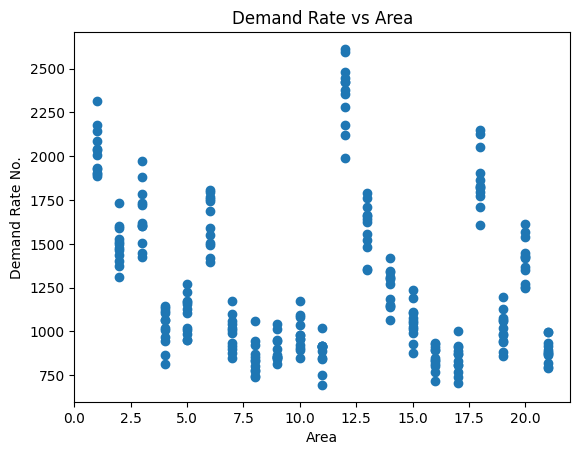

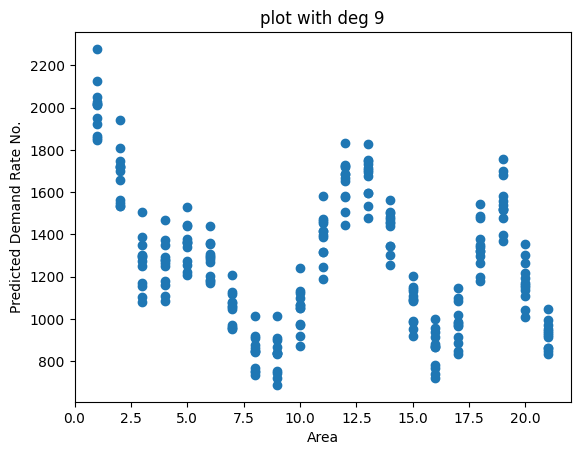

In [ ]:
mse=increasindegree(9)

Mean Squared Error: 93145.96707567794


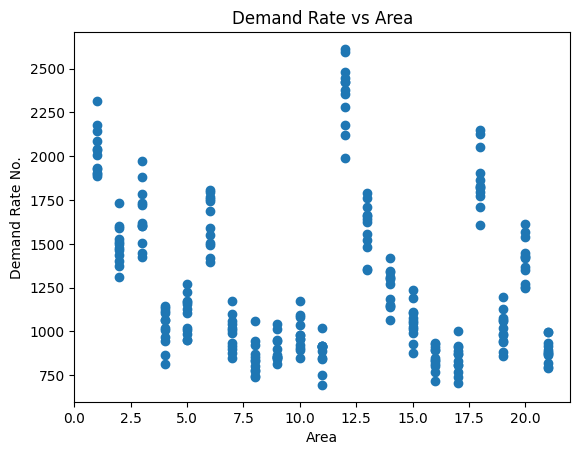

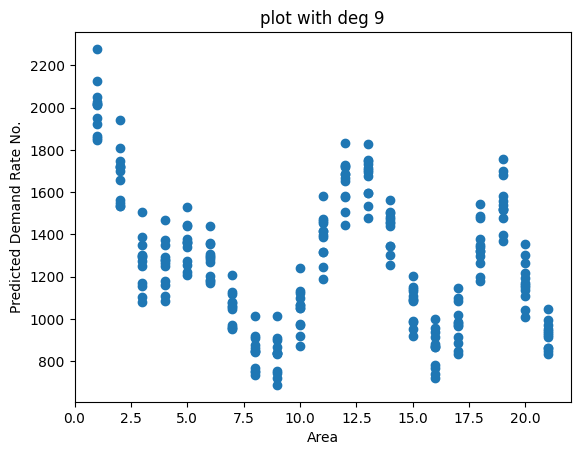

Mean Squared Error: 162065.6521410602


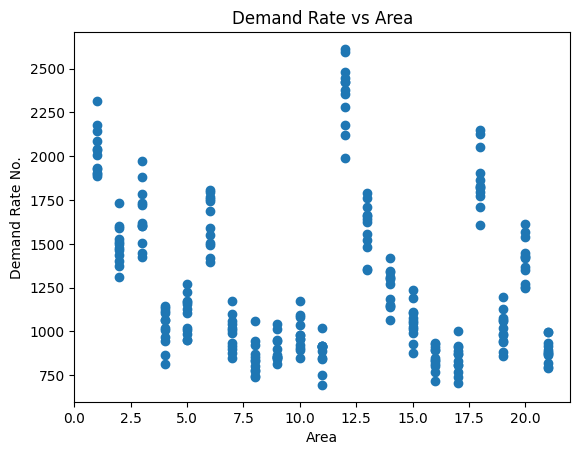

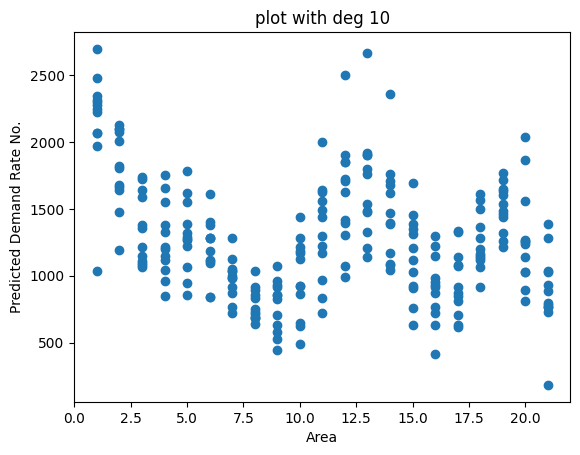

Mean Squared Error: 286010.59443508665


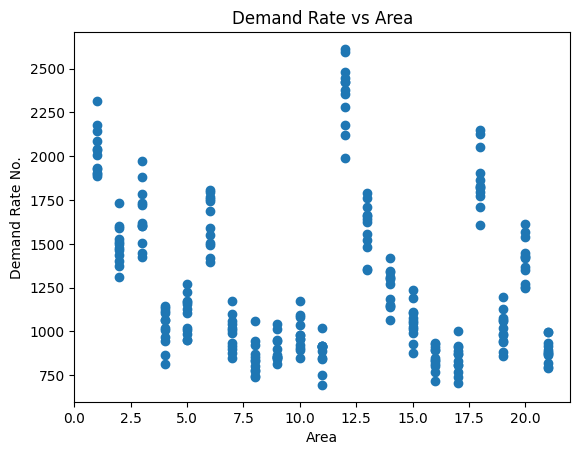

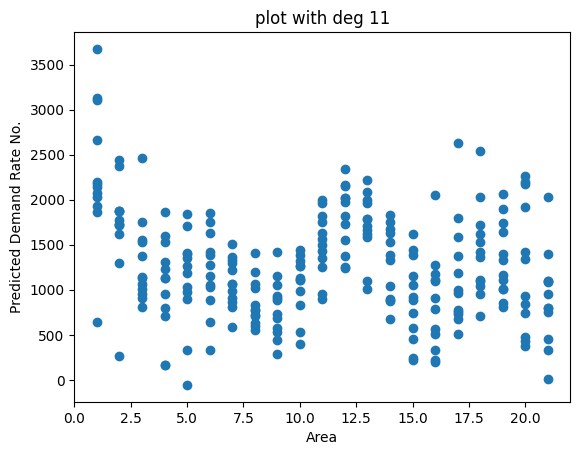

Mean Squared Error: 88748.01033194852


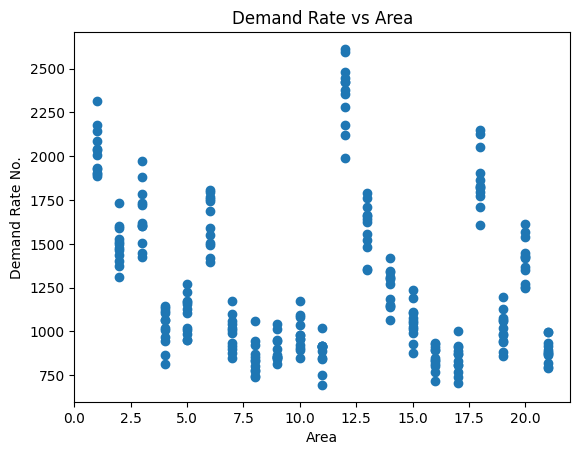

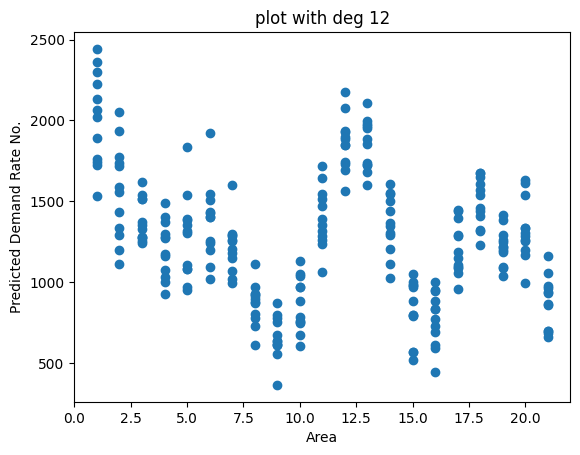

Mean Squared Error: 4860477.9816635605


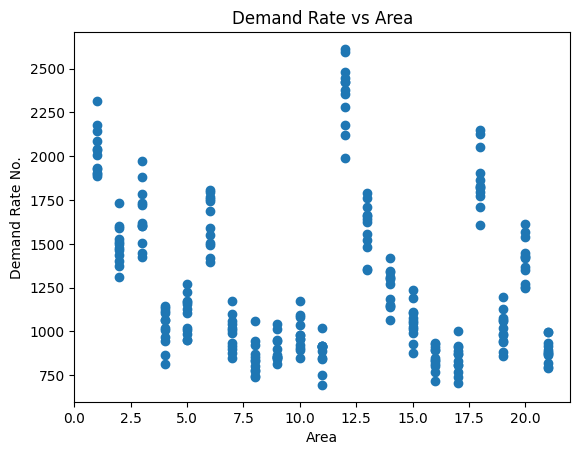

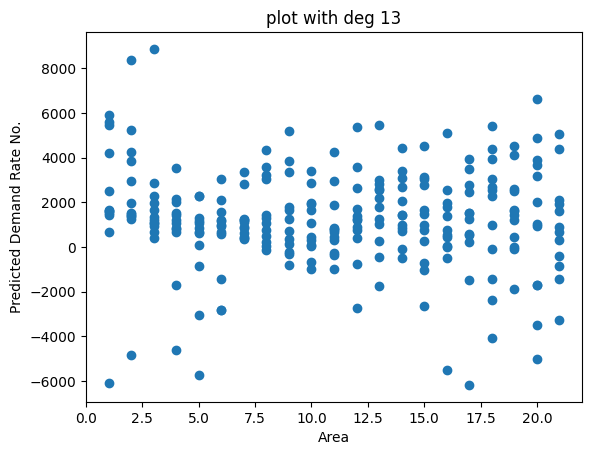

Mean Squared Error: 4021278.3629562045


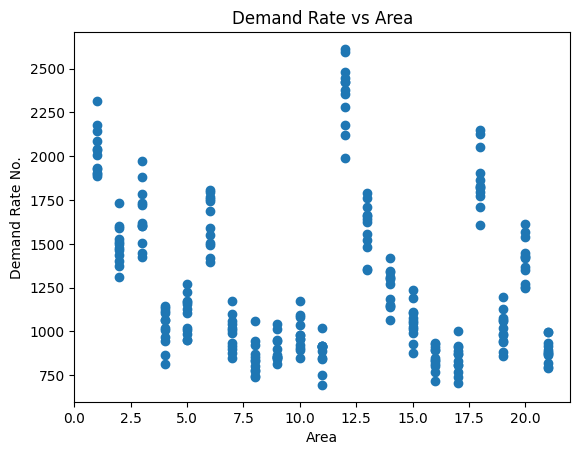

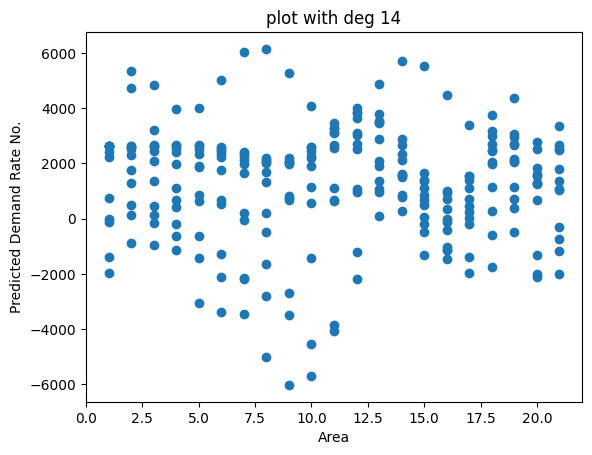

Mean Squared Error: 73026.12194167888


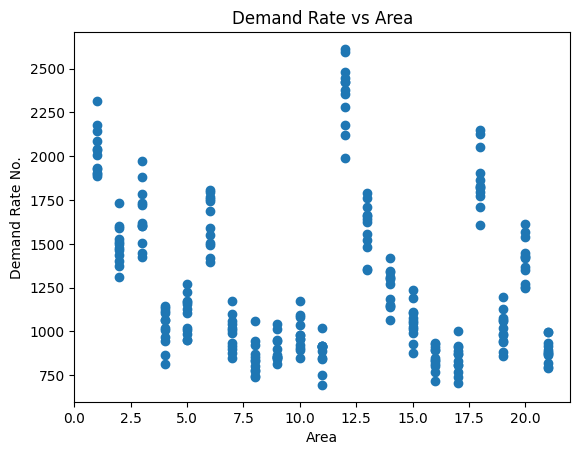

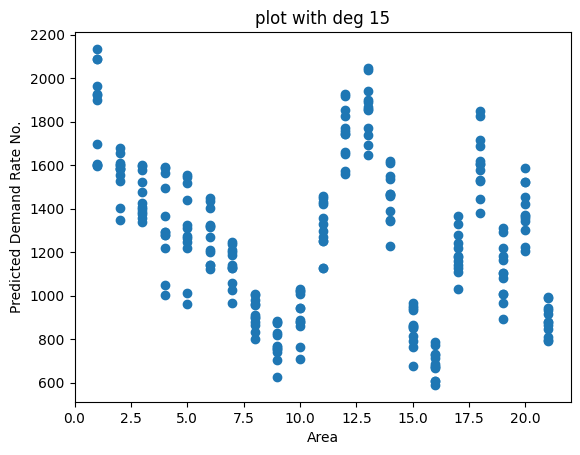

Mean Squared Error: 142186.68788093506


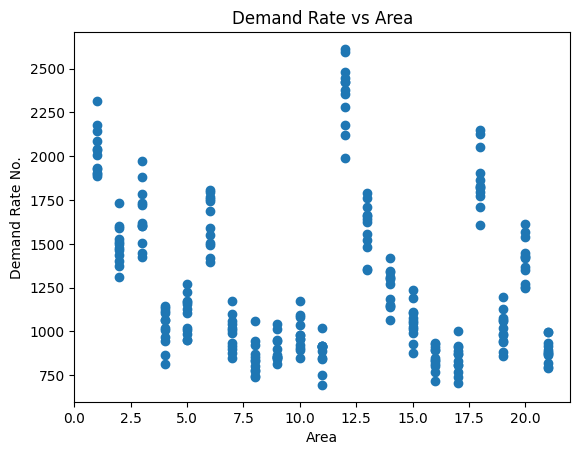

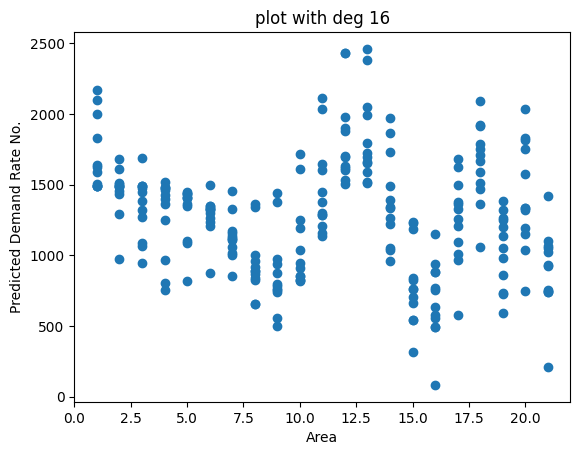

Mean Squared Error: 176813.4041579023


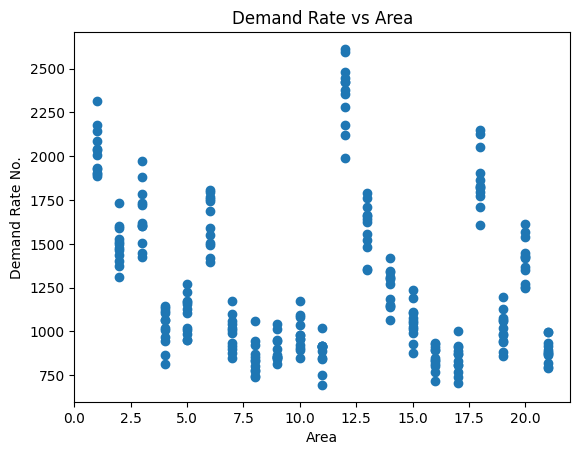

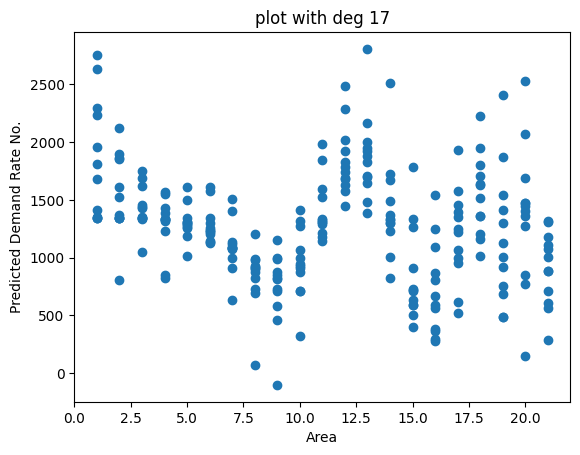

Mean Squared Error: 107913.04235966342


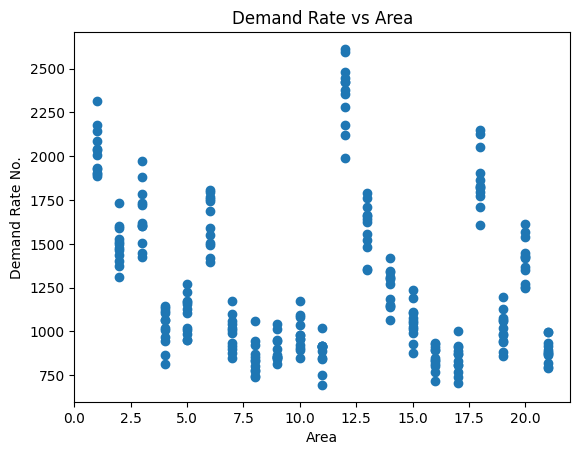

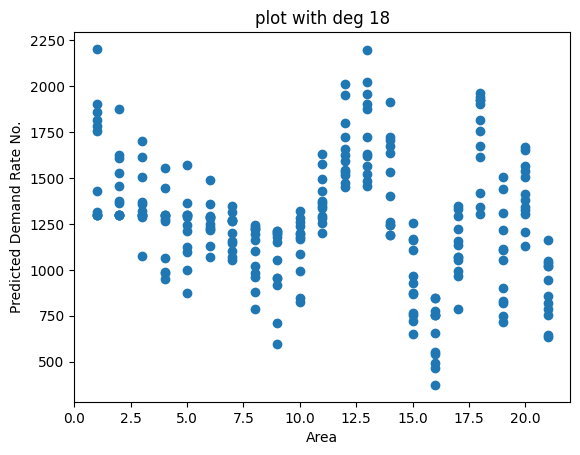

Mean Squared Error: 316396.4735265814


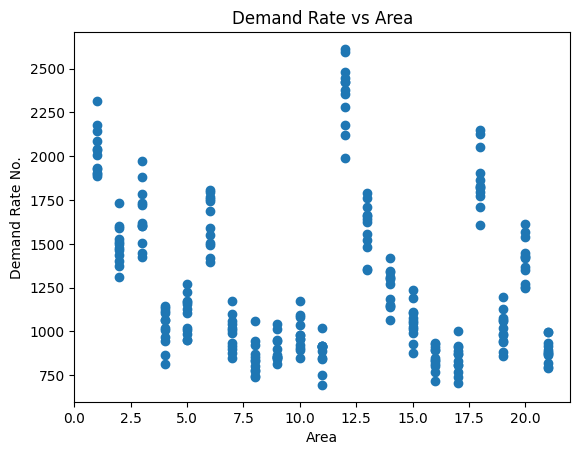

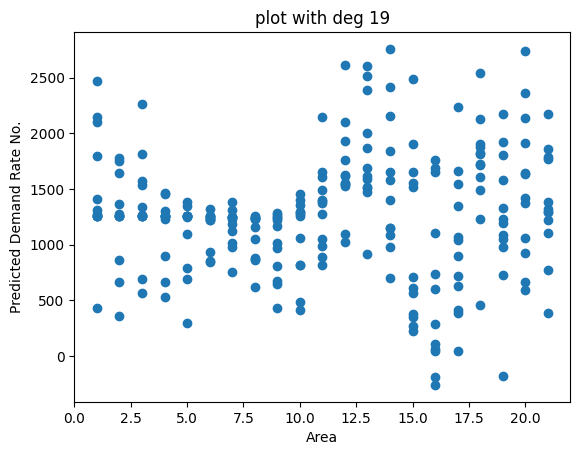

Mean Squared Error: 98893.80576209804


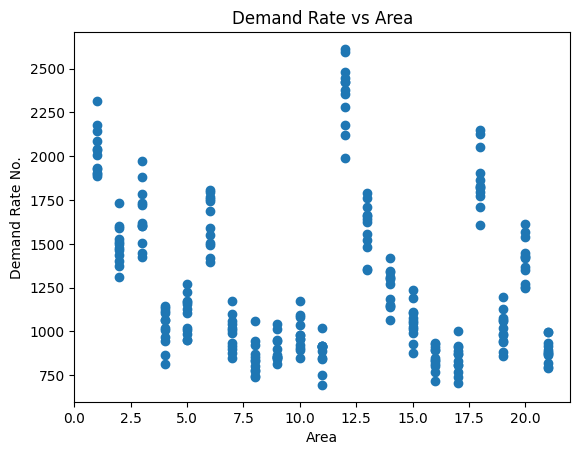

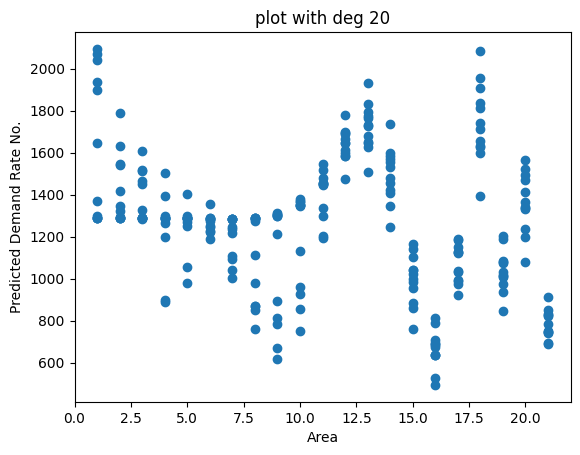

Mean Squared Error: 109383.60746315976


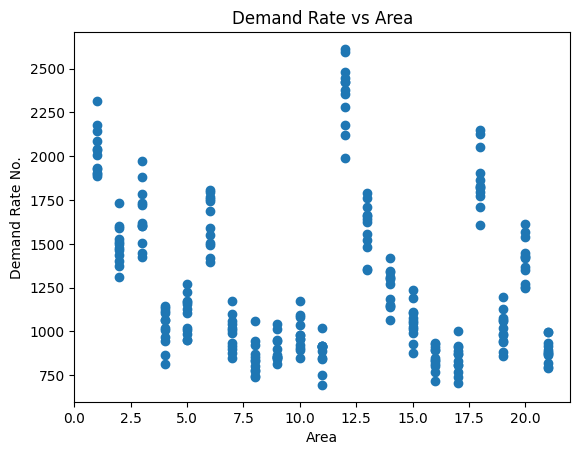

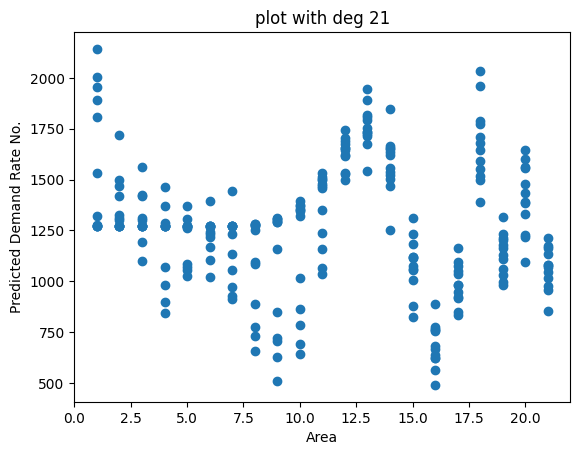

In [ ]:
dicc={}
for i in range (9,22):
    dicc[i]=increasindegree(i)

In [ ]:
dicc

{2: 177739.5445956632,
 3: 152184.65194377018,
 4: 148668.24151177172,
 5: 148024.70839436387,
 6: 226546.7702640646,
 7: 118856.14140619972,
 8: 115893.9780569843,
 9: 93145.96707567794,
 10: 162065.6521410602}

### Decision tree


### k-nearest neighboors
